## Run Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import ParameterGrid
import warnings
warnings.filterwarnings('ignore')

## Run Data

In [3]:
Df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [4]:
Df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


## Data Analysis Part

In [5]:
Df.shape

(4340, 8)

In [6]:
Df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
Df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
Df['owner'].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [10]:
Df.drop(['name'], axis=1, inplace=True)

In [11]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


In [12]:
# Encode categorical variables
label_encoder = LabelEncoder()
Df['fuel'] = label_encoder.fit_transform(Df['fuel'])
Df['seller_type'] = label_encoder.fit_transform(Df['seller_type'])
Df['transmission'] = label_encoder.fit_transform(Df['transmission'])
Df['owner'] = label_encoder.fit_transform(Df['owner'])

In [13]:
Df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,4,1,1,0
1,2007,135000,50000,4,1,1,0
2,2012,600000,100000,1,1,1,0
3,2017,250000,46000,4,1,1,0
4,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,1,1,2
4336,2014,409999,80000,1,1,1,2
4337,2009,110000,83000,4,1,1,2
4338,2016,865000,90000,1,1,1,0


## Divide Data into Train and Test

In [14]:
X = Df.drop(['selling_price'], axis=1)

In [15]:
y=Df['selling_price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Train Model

In [17]:
Lr = LinearRegression()

In [18]:
Lr.fit(X_train, y_train)

LinearRegression()

In [19]:
Lr.score(X_test, y_test)

0.4794695303927048

In [20]:
training_data_pred = Lr.predict(X_train)

## Use Cross validation for improving model performance

In [22]:
from sklearn import metrics

In [23]:
r2_score = metrics.r2_score(y_train, training_data_pred)
print("R Squared Erroe", r2_score)

R Squared Erroe 0.43722413751638123


In [24]:
from sklearn.model_selection import cross_val_score, KFold

In [25]:
# You can adjust the number of folds in KFold as needed
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
# Perform cross-validation
Cross_val_score = cross_val_score(Lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Cross-validation returns negative mean squared error, so we negate it to get positive values
cross_val_rmse = np.sqrt(-Cross_val_score)

In [27]:
# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", cross_val_rmse)
print("Mean RMSE:", np.mean(cross_val_rmse))

Cross-Validation RMSE Scores: [412670.70375808 350603.94759471 424780.72521473 388708.72288826
 561426.89737394]
Mean RMSE: 427638.1993659424


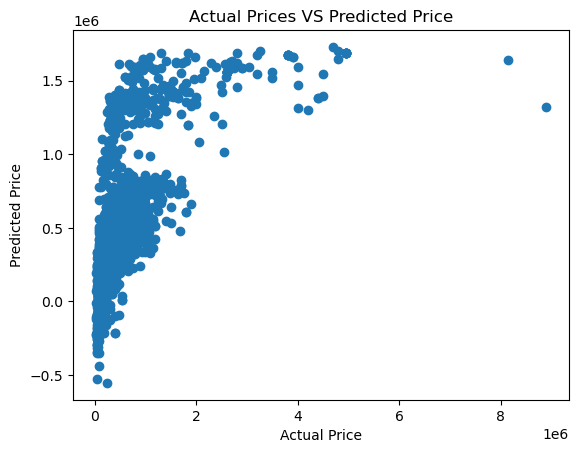

In [28]:
plt.scatter(y_train, training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Price")
plt.show()

In [29]:
test_data_pred = Lr.predict(X_test)

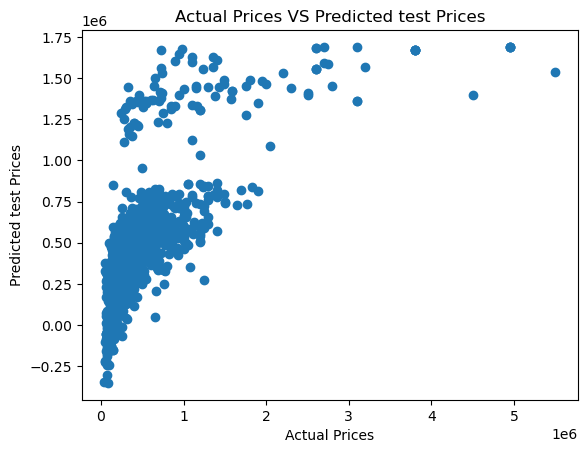

In [30]:
plt.scatter(y_test, test_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted test Prices")
plt.title("Actual Prices VS Predicted test Prices")
plt.show()

## Save Model

In [31]:
import joblib

In [32]:
joblib.dump(Lr, 'Car_Prices.pkl')

['Car_Prices.pkl']

In [33]:
Model = joblib.load('Car_Prices.pkl')

In [34]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,4,1,1,0
1,2007,50000,4,1,1,0
2,2012,100000,1,1,1,0
3,2017,46000,4,1,1,0
4,2014,141000,1,1,1,2


## Test Model Preformance

In [35]:
Data = pd.DataFrame({
    "year": 2007,
    'km_driven': 7000,
    'fuel':4, 
    "seller_type": 1,
    'transmission': 1,
    'owner':0
}, index=[0])

In [38]:
Model.predict(Data)

array([118432.84527819])